In [2]:
import linecache
import os
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
import sys
import threading
import time

In [3]:
from antidotedb import *
import sys



In [4]:
import numpy as np
from matplotlib import pyplot as plt

def Zipf(a: np.float64, min: np.uint64, max: np.uint64, size=None):
    """
    Generate Zipf-like random variables,
    but in inclusive [min...max] interval
    """
    if min == 0:
        raise ZeroDivisionError("")

    v = np.arange(min, max+1) # values to sample
    p = 1.0 / np.power(v, a)  # probabilities
    p /= np.sum(p)            # normalized

    return np.random.choice(v, size=size, replace=True, p=p)


In [5]:
# 每个单独的op
class Operation:
    op_type = True  #true is write
    variable = 0
    value = 0
    
    def __init__(self, op_type, variable, value):
        self.op_type = op_type
        self.variable = variable
        self.value = value

    def Read(self,variable):
        self.op_type = False
        self.variable = variable
        self.value = 0
    def Write(self,variable,value):
        self.op_type = True
        self.variable = variable
        self.value = value
    def Display_info(self):
        if(op_type==True):
            print("write," + str(variable) + "," + str(value))
        elif(op_type==False):
            print("read," + str(variable) + "," + str(value))
        else:
            print("Error in Operation op_type!")

In [6]:
# 每个trans包括很多op，用list保存
class Transaction:
    op_list = []
    def __init__(self, op_list):
        op_list = op_list
        
    def append_op(self,op):
        self.op_list = self.op_list.append(op)

In [7]:
# 每个client包括多个trans，在这里我们默认只有一个client
class Client:
    trans_list = []
    def __init__(self, trans_list):
        trans_list = trans_list

In [8]:
# 用法：randon_pick([true,false],[0.5,0.5])
def random_pick(some_list, probabilities): 
    x = random.uniform(0,1) 
    cumulative_probability = 0.0 
    for item, item_probability in zip(some_list, probabilities): 
        cumulative_probability += item_probability 
        if x < cumulative_probability:
               break 
    return item 

In [9]:
def set_initval(counter,variable_num):
    seq = []
    for i in range (0,variable_num):
        seq.append(i)
        i = i + 1
    counter = counter.fromkeys(seq, 0)
    return counter

In [10]:
def write_result(result_single_history,file):
    '''
        result_single_history is a three dimensional list
        file is the output path
    '''
    f=open(file,"w")
    for n_clients in range(0,len(result_single_history)):
        for n_trans in range(0,len(result_single_history[0])):
            for n_ops in range(0,len(result_single_history[0][0])):
                f.write(result_single_history[n_clients][n_trans][n_ops]+'\n')
    f.close()

In [55]:
counter = {} 
counter = set_initval(counter,50)
print ("新的字典为 : %s" %  str(counter))
op_type = random_pick([True,False],[0.5,0.5])
print(op_type)

新的字典为 : {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0}
True


In [11]:
def uniform_generator(output_path, his, client, trans, ops, var, wr):
    
    #define params 
    his_file = his 
    client_num = client
    trans_num = trans
    op_num = ops
    variable_num = var 
    all_hist = [] 
    for h in range (0,his_file): 
        doc =open(output_path+"hist_"+str(h)+".txt",'w')
        new_hist = [] 
        counter = {} 
        counter = set_initval(counter,variable_num) 
        for c in range (0,client_num):
            new_client = []
            for t in range (0,trans_num):
                new_transaction = []
                for op in range (0,op_num):
                    #按照比例选and是读或写
                    if wr == 55:
                        op_type = random_pick([True,False],[0.5,0.5])
                    elif wr == 19:
                        op_type = random_pick([True,False],[0.1,0.9])
                    elif wr ==91:
                        op_type = random_pick([True,False],[0.9,0.1])
                    else:
                        print('Wrong input wr!')

                    if(op_type==False): #READ
                    #   随机选择variable编号
                        variable = random.randint(0,variable_num-1)
                        new_op = Operation(False,variable,0)
                    elif(op_type==True):
                        variable = random.randint(0,variable_num-1)
                        value = counter[variable] +1
                        counter[variable] = value #更新counter内的值
                        new_op = Operation(True,variable,value)
                    else:
                        print("Error in op_type!")
                    #new_op.Display_info()
                    
                    if(new_op.op_type==True):
                        doc.write("write," + str(new_op.variable) + "," + str(new_op.value)+"\n")
                    elif(new_op.op_type==False):
                        doc.write("read," + str(new_op.variable) + "," + str(new_op.value)+"\n")
                    else:
                        print("Error in file Writing!")
        doc.close()
        print(output_path+"hist_"+str(h)+".txt"+" succeeded.")
                    # 需要将这个new_op保存到trans里面
#                     new_transaction.append(new_op)

#                 # 将新的new_transaction list保存到client 列表中
#                 new_client.append(new_transaction)
#             new_hist.append(new_client)
#         all_hist.append(new_hist)
#     # print all hist
# #     print(len(all_hist))
#     for h in range(0,len(all_hist)):
#         print("history file" + str(h) + ":")
#         for c in range(0,len(all_hist[h])):
#             print("client"+str(c)+":")
#             for t in range(0,len(all_hist[h][c])):
#                 print("transaction" + str(t) + ":")
#                 for op in range(0,len(all_hist[h][c][t])):
#                     print("op"+str(op))
#                     all_hist[h][c][t][op].Display_info()

In [12]:
def zipf_generator(output_path, his, client, trans, ops, var, wr):
    
    #define params 
    his_file = his 
    client_num = client
    trans_num = trans
    op_num = ops
    variable_num = var 
    all_hist = [] 
    for h in range (0,his_file): 
        doc =open(output_path+"hist_"+str(h)+".txt",'w')
        new_hist = [] 
        counter = {} 
        counter = set_initval(counter,variable_num)
        
        min = np.uint64(1)
        max = np.uint64(var)

        q = Zipf(1, min, max, client_num*trans_num*op_num)
        variable_list = [int(x)-1 for x in q]
        counter_for_variable = 0
        
        for c in range (0,client_num):
            new_client = []
            for t in range (0,trans_num):
                new_transaction = []
                for op in range (0,op_num):
                    #按照比例选and是读或写
                    if wr == 55:
                        op_type = random_pick([True,False],[0.5,0.5])
                    elif wr == 19:
                        op_type = random_pick([True,False],[0.1,0.9])
                    elif wr ==91:
                        op_type = random_pick([True,False],[0.9,0.1])
                    else:
                        print('Wrong input wr!')

                    if(op_type==False): #READ
                    #   使用zipf分布选择variable编号
                        variable = variable_list[counter_for_variable]
                        counter_for_variable = counter_for_variable+1
                        new_op = Operation(False,variable,0)
                    elif(op_type==True):
                        variable = variable_list[counter_for_variable]
                        counter_for_variable = counter_for_variable+1
                        value = counter[variable] +1
                        counter[variable] = value #更新counter内的值
                        new_op = Operation(True,variable,value)
                    else:
                        print("Error in op_type!")
                    #new_op.Display_info()
                    
                    if(new_op.op_type==True):
                        doc.write("write," + str(new_op.variable) + "," + str(new_op.value)+"\n")
                    elif(new_op.op_type==False):
                        doc.write("read," + str(new_op.variable) + "," + str(new_op.value)+"\n")
                    else:
                        print("Error in file Writing!")
        doc.close()
        print(output_path+"hist_"+str(h)+".txt"+" succeeded.")
                    # 需要将这个new_op保存到trans里面
#                     new_transaction.append(new_op)

#                 # 将新的new_transaction list保存到client 列表中
#                 new_client.append(new_transaction)
#             new_hist.append(new_client)
#         all_hist.append(new_hist)
#     # print all hist
# #     print(len(all_hist))
#     for h in range(0,len(all_hist)):
#         print("history file" + str(h) + ":")
#         for c in range(0,len(all_hist[h])):
#             print("client"+str(c)+":")
#             for t in range(0,len(all_hist[h][c])):
#                 print("transaction" + str(t) + ":")
#                 for op in range(0,len(all_hist[h][c][t])):
#                     print("op"+str(op))
#                     all_hist[h][c][t][op].Display_info()

In [13]:
def restrict_generator(output_path, his, client, trans, ops, var):
    '''
        Because of the restrictions, var_num must larger than ops_num
        Add three restrictions:
        1: Write a key only once.
        2: Read a key only once.
        3: For a same key, read must appears earlier. i.e. If write a key, there will be no read operation on this key afterwards.
    '''

    #define params 
    his_file = his 
    client_num = client
    trans_num = trans
    op_num = ops
    variable_num = var 
    all_hist = [] 
    
    if op_num > variable_num:
        print('Error: Because of the restrictions, var_num must larger than ops_num!')
        return False
    for h in range (0,his_file): 
        doc =open(output_path+"restrict_hist_"+str(h)+".txt",'w')
        new_hist = [] 
        counter = {} 
        counter = set_initval(counter,variable_num) 
        for c in range (0,client_num):
            new_client = []
            for t in range (0,trans_num):
                new_transaction = [] # Use to check the restrictions.
                
                for op in range (0,op_num):
                    #按照比例选and是读或写
                    op_type = random_pick([True,False],[0.5,0.5])

                    if(op_type==False): #READ
                    #   随机选择variable编号,但是不能是这个trans已经选择过的，如果选择到了已经读过的variable，那么就重新选。
                        variable = 0
                        while True:
                            variable = random.randint(0,variable_num-1)
                            flag = True
                            for i in range (0,len(new_transaction)):
                                if(variable==new_transaction[i].variable): #对于这个key，不论前面出现了这个key的读还是写，都不允许存在
                                    flag = False
                                else:
                                    continue
                            if(flag == True):
                                break
                            else:
                                continue

                        new_op = Operation(False,variable,0)
                    elif(op_type==True): #Write
                        variable = 0
                        while True:
                            variable = random.randint(0,variable_num-1)
                            flag = True
                            for i in range (0,len(new_transaction)):
                                if(variable==new_transaction[i].variable and new_transaction[i].op_type==True):
                                    flag = False
                                else:
                                    continue
                            if(flag == True):
                                break
                            else:
                                continue
                        
                        value = counter[variable] +1
                        counter[variable] = value #更新counter内的值
                        new_op = Operation(True,variable,value)
                    else:
                        print("Error in op_type!")
                    #new_op.Display_info()
                    new_transaction.append(new_op)
                    
                    if(new_op.op_type==True):
                        doc.write("write," + str(new_op.variable) + "," + str(new_op.value)+"\n")
                    elif(new_op.op_type==False):
                        doc.write("read," + str(new_op.variable) + "," + str(new_op.value)+"\n")
                    else:
                        print("Error in file Writing!")
                        
                        
        doc.close()
        print(output_path+"hist_"+str(h)+".txt"+" succeeded.")
        
        return True
                    # 需要将这个new_op保存到trans里面
#                     new_transaction.append(new_op)

#                 # 将新的new_transaction list保存到client 列表中
#                 new_client.append(new_transaction)
#             new_hist.append(new_client)
#         all_hist.append(new_hist)
#     # print all hist
# #     print(len(all_hist))
#     for h in range(0,len(all_hist)):
#         print("history file" + str(h) + ":")
#         for c in range(0,len(all_hist[h])):
#             print("client"+str(c)+":")
#             for t in range(0,len(all_hist[h][c])):
#                 print("transaction" + str(t) + ":")
#                 for op in range(0,len(all_hist[h][c][t])):
#                     print("op"+str(op))
#                     all_hist[h][c][t][op].Display_info()

In [14]:
def create_variables(n_trans,n_variable):
    server = 'localhost'
    port = 8087
    clt = AntidoteClient(server,port) 
    tx = clt.start_transaction() 
    ops = [] #存储operation
    
    for j in range(0,n_trans):
        for i in range(0,n_variable):
            key = bytes(str(i),'utf-8')
            trans = bytes(str(j),'utf-8')
            op = Key('0',key , "LWWREG")
            val = bytes('0','utf-8')
            operation = tx.update_objects( Register.AssignOp( op, val))
            #print(Register.AssignOp.getKey(op))
            #print(Register.AssignOp.getType(op))
            ops.append(op)
    tx.commit()

    
#     commit = tx.commit()
#     print(commit)

In [15]:
def generate_clients(hist_file,n_clients,n_trans,n_ops):
    #input a single history file, contains n transactions.
    #Output a list of transaction,each transaction is a list of operation
    fo = open(hist_file, "r")
    print ("文件名为: ", fo.name)
    list_line = []
    for line in fo.readlines():                          #依次读取每行  
        line = line.strip()                             #去掉每行头尾空白,line is a list, contains all ops in hist file
        list_line.append(line)
    # 关闭文件
    fo.close()
    # print(list_line)
#     need a three dimension list: clients,trans,ops
    start = 0
    end = n_ops
    list_clients = []
    
    
    for i in range(0,n_clients):
        temp_trans = []
        for j in range(0,n_trans):
            temp_ops = list_line[start:end]
            temp_trans.append(temp_ops)
            start = start+n_ops
            end = end+n_ops
        list_clients.append(temp_trans)
        
    return list_clients

In [16]:
'''
    list_of_ops is a 2 dimensional list, contains trans and ops.
    each client is a thread.
'''
def exec_session(list_of_ops,client_id):
    result_ops = []
    server = 'localhost'
    port = 8087
    clt = AntidoteClient(server,port) 
    tx = clt.start_transaction()
    n_trans = len(list_of_ops)
    
    op_num = 0
    
    for i in range(0,n_trans):
        temp_tx_op = []
        for j in range(0,len(list_of_ops[i])):
#             print('now dealing with : '+list_of_ops[i][j])
            op = str.split(list_of_ops[i][j],',',3)
            # create a new variable
            key = bytes(op[1],'utf-8')
            trans = bytes(str(i),'utf-8')
            new_key = Key('0',key , "LWWREG")
            
            if(op[0]=='write'):
                # if op is a write, then set value to this key
                val = bytes(op[2],'utf-8')
                operation = tx.update_objects( Register.AssignOp( new_key, val))
                res = tx.read_objects(new_key)
                # record the op
                record_key = int(Register.AssignOp.getKey(new_key))
#                 print('write key: '+str(record_key))

                record_val = int(res[0].value())
#                 print('wirte key with value: '+str(record_val))
                single_op = 'w(' +  str(record_key) +',' + str(record_val) +','+ str(client_id) +','+str(i) +','+ str(op_num)+')'
                temp_tx_op.append(single_op)
                op_num = op_num +1
            elif(op[0]=='read'):
                res = tx.read_objects(new_key)
                # print( res[0].value())
                record_key = int(Register.AssignOp.getKey(new_key))
#                 print('read key: '+str(record_key))
                record_val = int(res[0].value())
#                 print('read key with value: '+str(record_val))
                
                single_op = 'r(' +  str(record_key) +',' + str(record_val) +','+ str(client_id) +','+str(i) +','+ str(op_num)+')'
                temp_tx_op.append(single_op)
                op_num = op_num +1
            else:
                print("unknown wrong type op.")
        result_ops.append(temp_tx_op)
    tx.commit()
    
    return result_ops

In [17]:
class MyThread(threading.Thread):
    def __init__(self, func, args, name=''):
        threading.Thread.__init__(self)
        self.name = name
        self.func = func
        self.args = args
        self.result = self.func(*self.args)
 
    def get_result(self):
        try:
            return self.result
        except Exception:
            return None

In [18]:
'''
    execute a history file in multiple threads(clients).
    history data is stored in a three dimensional list, list_of_ops.
    
'''
def exec_history(list_of_ops):
    n_clients = len(list_of_ops)
    n_trans = len(list_of_ops[0])
    n_ops = len(list_of_ops[0][0])
    thread_clients = []
#     each thread calls this: exec_session(list_of_ops[i_thread],i_result_ops), i_result_ops is a two dimensional list
    result_clients = []

    for i in range(0,n_clients):
        new_client = MyThread(exec_session,(list_of_ops[i],i,), exec_session.__name__)
        thread_clients.append(new_client)
    for i in range(0,n_clients):
        thread_clients[i].start()
    for i in range(0,n_clients):
        thread_clients[i].join()
        
    for i in range(0,n_clients):
        temp_result = thread_clients[i].get_result()
#         print(temp_result)
        result_clients.append(temp_result)
    
    return result_clients

In [1]:
'''
    for uniform history.
'''
if __name__ == '__main__':
    # client_num = [5,10,50,100]
    client_num = [20]
    transaction_num = [1000]
    wr_profile = [55]
    key_num = [100]
    
    for c in client_num:
        for t in transaction_num:
            for wr in wr_profile:
                for k in key_num:
                    path = '../DATA2/client' + str(c) + '/transaction' + str(t) + '/wr' + str(wr) + '/key' +str(k) +'/uniform/'
                    
                    uniform_generator(path,10,c,t,1,k,wr)
                    for i in range(0,100):
                        generate_file = path + 'hist_'+str(i)+'.txt'
                        result_file = path + 'result_'+str(i)+'.txt'
                        list_of_ops = generate_clients(generate_file,c,t,1)
                        create_variables(1,k)
                        result_single_history = exec_history(list_of_ops)
                        write_result(result_single_history,result_file)

NameError: name 'uniform_generator' is not defined

In [21]:
'''
    for zipf history.
'''
if __name__ == '__main__':
    # client_num = [5,10,50,100]
    client_num = [20]
    transaction_num = [100]
    wr_profile = [55]
    key_num = [100]
    
    for c in client_num:
        for t in transaction_num:
            for wr in wr_profile:
                for k in key_num:
                    path = '../DATATEST/Antidote/client' + str(c) + '/transaction' + str(t) + '/wr' + str(wr) + '/key' +str(k) +'/zipf/'
                    
                    zipf_generator(path,100,c,t,1,k,wr)
                    for i in range(0,100):
                        generate_file = path + 'hist_'+str(i)+'.txt'
                        result_file = path + 'result_'+str(i)+'.txt'
                        list_of_ops = generate_clients(generate_file,c,t,1)
                        create_variables(1,k)
                        result_single_history = exec_history(list_of_ops)
                        write_result(result_single_history,result_file)

../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_0.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_1.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_2.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_3.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_4.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_5.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_6.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_7.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_8.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_9.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_10.txt succeeded.
../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_11.txt s

文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_1.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_2.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_3.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_4.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_5.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_6.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_7.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_8.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_9.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_10.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_11.txt
文件名为:  ../DATATEST/Antidote/client20/transaction100/wr55/key100/zipf/hist_12.txt
文件名为:  ../DATATEST/Antidote/client20/

In [64]:
'''
    example for main__
'''
generator("../src/histroy_file/",3,5,5,8,3)
list_of_ops = generate_clients('../src/histroy_file/hist_0.txt',5,5,8)
# print(list_of_ops)
create_variables(5,3)
result_single_history = exec_history(list_of_ops)
# print(result_single_history)
write_result(result_single_history,'../src/result_file/hist_0.txt')

../src/histroy_file/hist_0.txt succeeded.
../src/histroy_file/hist_1.txt succeeded.
../src/histroy_file/hist_2.txt succeeded.
文件名为:  ../src/histroy_file/hist_0.txt


[47 34 27 21 24 11  9 13 12  9  3 12  5  7  6  7  4  4  7  7  2  4 10  5
  5  0  1  0  2  4  4  5  0  4  5  2  3  4  2  2  1  1  0  1  1  1  5  1
  1  3  4  0  1  2  1  2  1  1  1  2  0  1  3  1  1  3  2  0  1  1  1  1
  2  0  4  2  1  1  0  0  0  1  4  1  3  1  1  0  1  0  4  1  0  0  2  0
  1  1  0  0]
[  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5  47.5
  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5  59.5
  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5  71.5
  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5
  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5
  96.5  97.5  98.5  99.5 100.5]


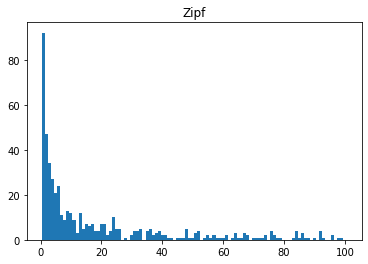

In [37]:
q = Zipf(1, min, max, 501)
variable_list = [int(x)-1 for x in q]
h, bins = np.histogram(variable_list, bins = int(max-min+1),range=(min-0.5,max+0.5))
print(h)
print(bins)

plt.hist(q, bins = bins)
plt.title("Zipf")
plt.show()